In [76]:
import torch
import torchvision
from torch import nn
print(torch.__version__)
import matplotlib.pyplot as plt
import numpy as np

2.6.0+cu124


In [10]:
normalize = lambda x: x/255.0

In [94]:
train_data = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=torchvision.transforms.ToTensor())

In [95]:
train_targets = train_data.targets
test_targets = test_data.targets

In [96]:
train_data = train_data.data.to(torch.float32)/255.0
test_data = test_data.data.to(torch.float32)/255.0

In [97]:
train_data = train_data.data.flatten(start_dim=1, end_dim=-1)
test_data = test_data.data.flatten(start_dim=1, end_dim=-1)

In [74]:
# Neural Network Parameters
batch_size, n_epoch = 100, 50
n_hidden, z_dim = 256, 2

In [87]:
class AutoEncoder_v1(nn.Module):
    def __init__(self,hidden_size: list = [256, 128], z_dim: int = 2):
        super(AutoEncoder_v1, self).__init__()
        self.__hidden_size = hidden_size
        self.__z_dim = z_dim
        self.embedding = None
        self.__encoder = nn.Sequential(
            nn.Linear(28*28, self.__hidden_size[0]),
            nn.ReLU(),
            nn.Linear(self.__hidden_size[0], self.__hidden_size[1]),
            nn.ReLU(),
            nn.Linear(self.__hidden_size[1], self.__z_dim)
        )    
        self.__decoder = nn.Sequential(
            nn.Linear(self.__z_dim, self.__hidden_size[1]),
            nn.ReLU(),
            nn.Linear(self.__hidden_size[1], self.__hidden_size[0]),
            nn.ReLU(),
            nn.Linear(self.__hidden_size[0], 28*28),
            nn.Sigmoid()
        )
    def forward(self, x):
        z = self.__encoder(x)
        self.embedding = z
        x_reconst = self.__decoder(z)
        return x_reconst     

In [90]:
model = AutoEncoder_v1()
print(model)

AutoEncoder_v1(
  (_AutoEncoder_v1__encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
  (_AutoEncoder_v1__decoder): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=784, bias=True)
    (5): Sigmoid()
  )
)


In [91]:
loss_fn = nn.MSELoss()

def train(model, train_data, n_epoch, batch_size):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    n_batch = len(train_data) // batch_size
    for epoch in range(n_epoch):
        total_loss = 0
        for i in range(n_batch):
            batch_x = train_data[i*batch_size:(i+1)*batch_size]
            x_reconst = model(batch_x)
            loss = loss_fn(x_reconst, batch_x)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / n_batch
        print(f'Epoch [{epoch+1}/{n_epoch}], Loss: {avg_loss:.4f}')
    print('Training Finished!')

In [92]:
train(model, train_data, n_epoch, batch_size)

Epoch [1/50], Loss: 0.0578
Epoch [2/50], Loss: 0.0460
Epoch [3/50], Loss: 0.0429
Epoch [4/50], Loss: 0.0414
Epoch [5/50], Loss: 0.0404
Epoch [6/50], Loss: 0.0397
Epoch [7/50], Loss: 0.0391
Epoch [8/50], Loss: 0.0387
Epoch [9/50], Loss: 0.0382
Epoch [10/50], Loss: 0.0378
Epoch [11/50], Loss: 0.0374
Epoch [12/50], Loss: 0.0373
Epoch [13/50], Loss: 0.0370
Epoch [14/50], Loss: 0.0368
Epoch [15/50], Loss: 0.0366
Epoch [16/50], Loss: 0.0363
Epoch [17/50], Loss: 0.0362
Epoch [18/50], Loss: 0.0361
Epoch [19/50], Loss: 0.0359
Epoch [20/50], Loss: 0.0358
Epoch [21/50], Loss: 0.0356
Epoch [22/50], Loss: 0.0356
Epoch [23/50], Loss: 0.0356
Epoch [24/50], Loss: 0.0354
Epoch [25/50], Loss: 0.0351
Epoch [26/50], Loss: 0.0352
Epoch [27/50], Loss: 0.0350
Epoch [28/50], Loss: 0.0349
Epoch [29/50], Loss: 0.0349
Epoch [30/50], Loss: 0.0348
Epoch [31/50], Loss: 0.0347
Epoch [32/50], Loss: 0.0346
Epoch [33/50], Loss: 0.0347
Epoch [34/50], Loss: 0.0345
Epoch [35/50], Loss: 0.0344
Epoch [36/50], Loss: 0.0344
E

In [ ]:
x0= train_data[1,:]
x0_rec = model(x0)
x0_rec.shape

torch.Size([784])

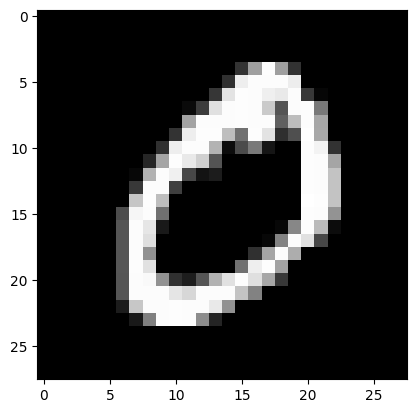

In [83]:
plt.imshow(x0.detach().numpy().reshape(28,28), cmap='gray')

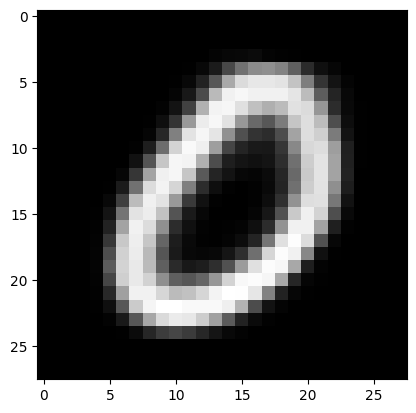

In [84]:
plt.imshow(x0_rec.detach().numpy().reshape(28,28), cmap='gray')


In [107]:
embeddings = []
class_labels  = []
for ind,exa in enumerate(train_data[:7000]):
    _ = model(exa)
    embeddings.append(model.embedding.detach().numpy())
    class_labels.append(train_targets[ind].item())
embeddings = np.array(embeddings)    

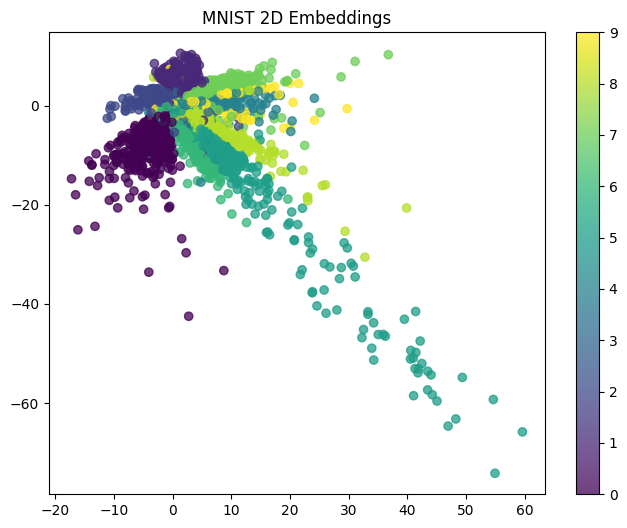

In [108]:
# Plot of the digit classes in the latent space
plt.figure(figsize=(8, 6))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=class_labels, alpha=0.75)
plt.title('MNIST 2D Embeddings')
plt.colorbar()
plt.show()